In [1]:
from pathlib import Path
import itertools
import json

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

In [2]:
# READ SETTINGS
with open("../settings.json", "r") as f:
    settings = json.load(f)
partition = settings["partition"]
Nlayers = settings["Nlayers"]
Nnodes = settings["Nnodes"]

In [3]:
# Directories
WORK_DIR = Path().absolute()
RES_DIR = (
    WORK_DIR / "results" / f"{partition}_partition_{'_'.join([str(n) for n in Nnodes])}"
)
JAC_DIR = RES_DIR / "Jacobian"

In [4]:
# Test configs
seeds = [1, 1717, 2024]
ratios = [0.05, 0.1, 0.25, 0.4, 0.5]

In [5]:
nparams_eff = {
    seed: {
        key: {"ndata": [], "nparams": [], "cost": []}
        for key in ["test", "validation"]
    }
    for seed in seeds
}

for ss in seeds:
    for rr in ratios:
        fdir = f"test_validation_{int(rr*100)}%_seed{ss}"
        fname = "number_effective_params.json"
        print(fdir)
        try:
            # Load
            with open(JAC_DIR / fdir / fname, "r") as f:
                result_dict = json.load(f)
            print(result_dict)
            # Read
            for key in ["test", "validation"]:
                nparams_eff[ss][key]["ndata"].append(result_dict[key]["ndata"])
                nparams_eff[ss][key]["nparams"].append(result_dict[key]["N"])
                nparams_eff[ss][key]["cost"].append(result_dict[key]["min_cost"])
        except FileNotFoundError:
            pass

test_validation_5%_seed1
{'test': {'min_cost': 0.24956960432609776, 'ndata': 64771, 'N': 1038}, 'validation': {'min_cost': 0.011232834709517192, 'ndata': 3719, 'N': 659}}
test_validation_10%_seed1
{'test': {'min_cost': 0.23859193783573573, 'ndata': 61473, 'N': 1037}, 'validation': {'min_cost': 0.022210501199879218, 'ndata': 7017, 'N': 696}}
test_validation_25%_seed1
{'test': {'min_cost': 0.19194329506717622, 'ndata': 51573, 'N': 1011}, 'validation': {'min_cost': 0.06885918646730715, 'ndata': 16917, 'N': 819}}
test_validation_40%_seed1
{'test': {'min_cost': 0.15731228422373533, 'ndata': 41240, 'N': 995}, 'validation': {'min_cost': 0.10349019731074804, 'ndata': 27250, 'N': 888}}
test_validation_50%_seed1
{'test': {'min_cost': 0.11503548191831214, 'ndata': 34674, 'N': 1014}, 'validation': {'min_cost': 0.14576699961617123, 'ndata': 33816, 'N': 890}}
test_validation_5%_seed1717
{'test': {'min_cost': 0.22091189907951048, 'ndata': 64771, 'N': 1051}, 'validation': {'min_cost': 0.03989058245497

In [6]:
nparams_eff

{1: {'test': {'ndata': [64771, 61473, 51573, 41240, 34674],
   'nparams': [1038, 1037, 1011, 995, 1014],
   'cost': [0.24956960432609776,
    0.23859193783573573,
    0.19194329506717622,
    0.15731228422373533,
    0.11503548191831214]},
  'validation': {'ndata': [3719, 7017, 16917, 27250, 33816],
   'nparams': [659, 696, 819, 888, 890],
   'cost': [0.011232834709517192,
    0.022210501199879218,
    0.06885918646730715,
    0.10349019731074804,
    0.14576699961617123]}},
 1717: {'test': {'ndata': [64771, 61107, 50649, 41276, 34140],
   'nparams': [1051, 1053, 1027, 1000, 940],
   'cost': [0.22091189907951048,
    0.21188539554714225,
    0.17973265937325777,
    0.15010387808433734,
    0.12312219471641583]},
  'validation': {'ndata': [3719, 7383, 17841, 27214, 34350],
   'nparams': [503, 595, 783, 880, 951],
   'cost': [0.0398905824549729,
    0.0489170434884727,
    0.0810698221612256,
    0.11069856095127761,
    0.13768024431919912]}},
 2024: {'test': {'ndata': [65023, 61119, 5

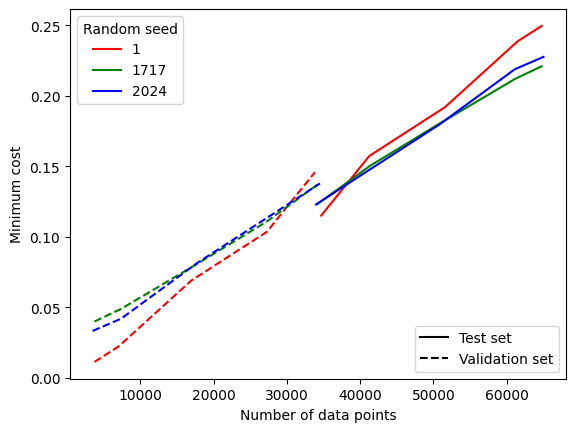

In [7]:
# Plot
plt.figure()
colors = ["r", "g", "b", "k"]
for ii, seed in enumerate(seeds):
    plt.plot(
        nparams_eff[seed]["test"]["ndata"],
        nparams_eff[seed]["test"]["cost"],
        c=colors[ii],
        ls="-",
        label=seed,
    )
    plt.plot(
        nparams_eff[seed]["validation"]["ndata"],
        nparams_eff[seed]["validation"]["cost"],
        c=colors[ii],
        ls="--",
    )
legend1 = plt.legend(title="Random seed", loc=0)

# Dummy lines
ls_list = ["-", "--"]
label2_list = ["Test set", "Validation set"]
dummy_lines = [
    plt.plot([], [], c="k", ls=ls_list[ii], label=label2_list[ii])[0] for ii in range(2)
]
legend2 = plt.legend(dummy_lines, label2_list, loc=4)
plt.gca().add_artist(legend1)

plt.xlabel("Number of data points")
plt.ylabel("Minimum cost")
plt.show()

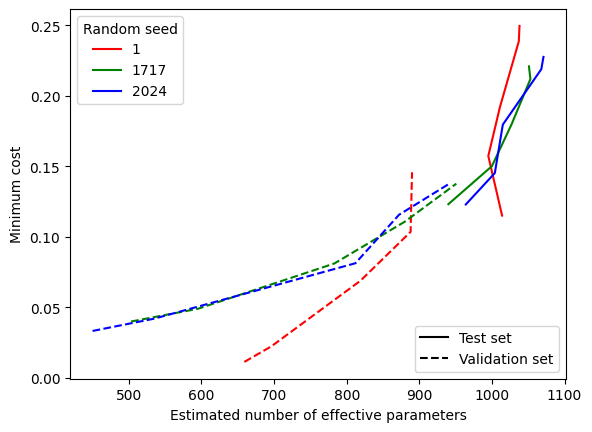

In [8]:
# Plot
plt.figure()
colors = ["r", "g", "b", "k"]
for ii, seed in enumerate(seeds):
    plt.plot(
        nparams_eff[seed]["test"]["nparams"],
        nparams_eff[seed]["test"]["cost"],
        c=colors[ii],
        ls="-",
        label=seed,
    )
    plt.plot(
        nparams_eff[seed]["validation"]["nparams"],
        nparams_eff[seed]["validation"]["cost"],
        c=colors[ii],
        ls="--",
    )
legend1 = plt.legend(title="Random seed", loc=0)

# Dummy lines
ls_list = ["-", "--"]
label2_list = ["Test set", "Validation set"]
dummy_lines = [
    plt.plot([], [], c="k", ls=ls_list[ii], label=label2_list[ii])[0] for ii in range(2)
]
legend2 = plt.legend(dummy_lines, label2_list, loc=4)
plt.gca().add_artist(legend1)

plt.xlabel("Estimated number of effective parameters")
plt.ylabel("Minimum cost")
plt.show()

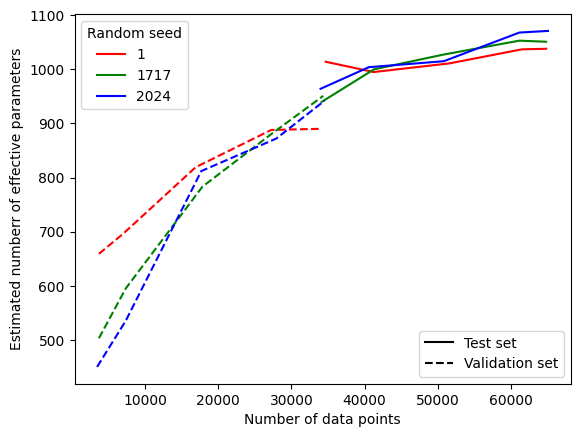

In [9]:
# Plot
plt.figure()
colors = ["r", "g", "b", "k"]
for ii, seed in enumerate(seeds):
    plt.plot(
        nparams_eff[seed]["test"]["ndata"],
        nparams_eff[seed]["test"]["nparams"],
        c=colors[ii],
        ls="-",
        label=seed,
    )
    plt.plot(
        nparams_eff[seed]["validation"]["ndata"],
        nparams_eff[seed]["validation"]["nparams"],
        c=colors[ii],
        ls="--",
    )
legend1 = plt.legend(title="Random seed", loc=0)

# Dummy lines
ls_list = ["-", "--"]
label2_list = ["Test set", "Validation set"]
dummy_lines = [
    plt.plot([], [], c="k", ls=ls_list[ii], label=label2_list[ii])[0] for ii in range(2)
]
legend2 = plt.legend(dummy_lines, label2_list, loc=4)
plt.gca().add_artist(legend1)

plt.xlabel("Number of data points")
plt.ylabel("Estimated numberr of effective parameters")
plt.show()

In [10]:
eigvals_1 = np.load(
    "results/mingjian_partition_128_128_128/Jacobian/test_validation_10%_seed1/eighvals_entire_network_test.npy"
)
eigvals_2 = np.load(
    "results/mingjian_partition_128_128_128/Jacobian/test_validation_10%_seed1717/eighvals_entire_network_test.npy"
)

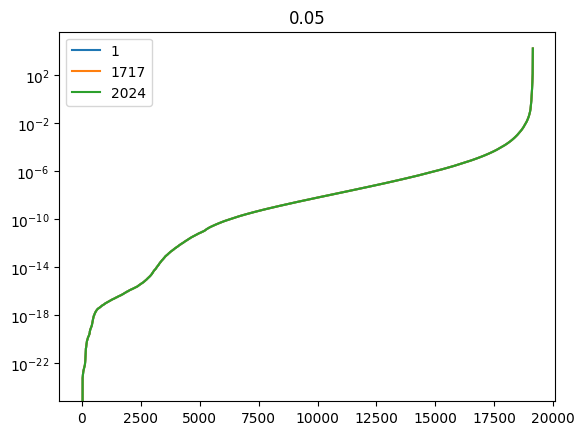

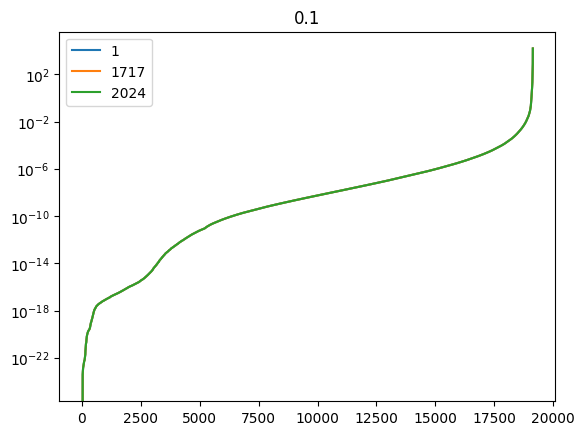

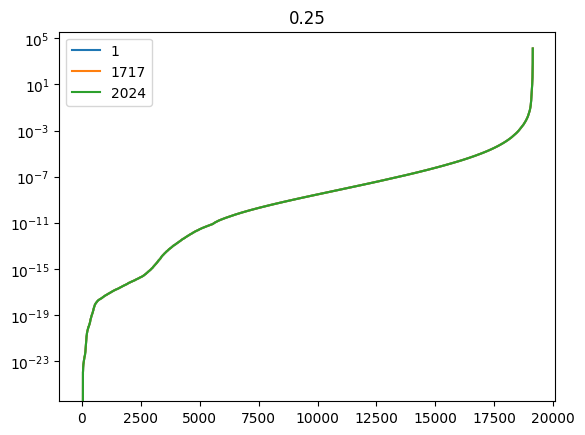

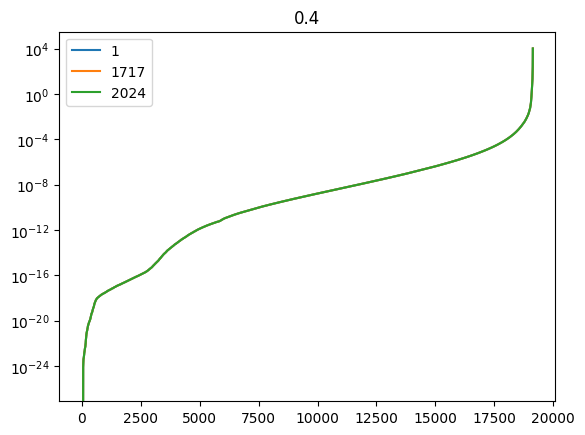

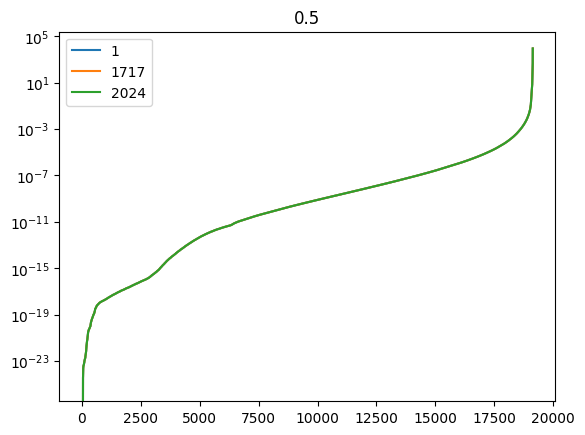

In [11]:
for rr in ratios:
    plt.figure()
    plt.title(rr)
    for seed in seeds:
        fdir = f"test_validation_{int(rr*100)}%_seed{ss}"
        eigvals = np.load(JAC_DIR / fdir / "eighvals_entire_network_test.npy")
        plt.plot(eigvals, label=seed)
    plt.yscale("log")
    plt.legend()
plt.show()